<a href="https://colab.research.google.com/github/SudhanvaHG/MiniProject/blob/main/Overlapping_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementing Overlapping Clustering using K means

#### Import numpy, sci-kit learn and pyplot libraries

In [80]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### Generate some random data for demonstration

In [81]:
np.random.seed(0)
X = np.random.rand(100, 2)

#### Declare number of clusters and Initialize K means

In [82]:
K = 3 # Number of clusters

kmeans = KMeans(n_clusters=K) # Initialize K-means

kmeans.fit(X) # Fit K-means to the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

#### Get the cluster centers and labels

In [83]:
cluster_centers = kmeans.cluster_centers_

labels = kmeans.labels_

#### Specify the Cluster Radius

In [84]:
radius_threshold = 0.25 #cm

#### Assign data points to clusters based on the radius threshold

In [85]:
cluster_assignments = []
for data_point in X:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(data_point - center)
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)

#### Plot the clusters

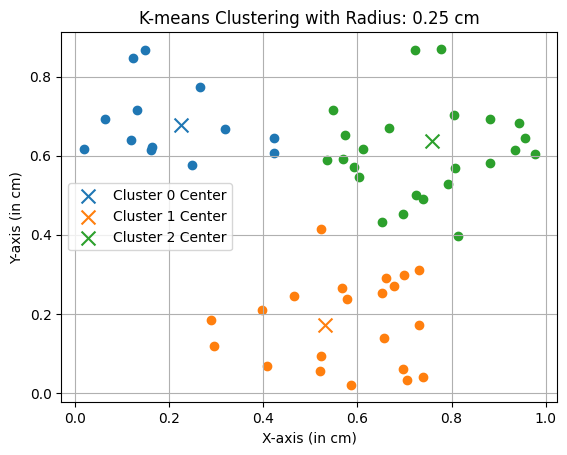

In [86]:
# Plotting data points:
for i in range(len(cluster_assignments)):
    x, y = X[i]
    for cluster in cluster_assignments[i]:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        plt.scatter(x, y, c=f'C{cluster_idx}', marker='o')

# Plotting cluster centroids:
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='x', s=100, label=f'Cluster {i} Center')

# Plotting labels:
plt.title('K-means Clustering with Radius: '+str(radius_threshold)+' cm')
plt.xlabel('X-axis (in cm)')
plt.ylabel('Y-axis (in cm)')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
iris = sns.load_dataset('iris')
#print(iris)

X = iris[['petal_length','petal_width','sepal_length','sepal_width']]
#print(X)

### Apply PCA for the dataset

In [88]:
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

#print(X_2D)

In [90]:
K = 3

kmeans = KMeans(n_clusters=K)

kmeans.fit(X_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

#### Cluster initialization

In [94]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

#print(cluster_centers)
#print(labels)

radius_threshold = 0.3

In [95]:
cluster_assignments = []
for data_point in X_2D:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(data_point - center)
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)

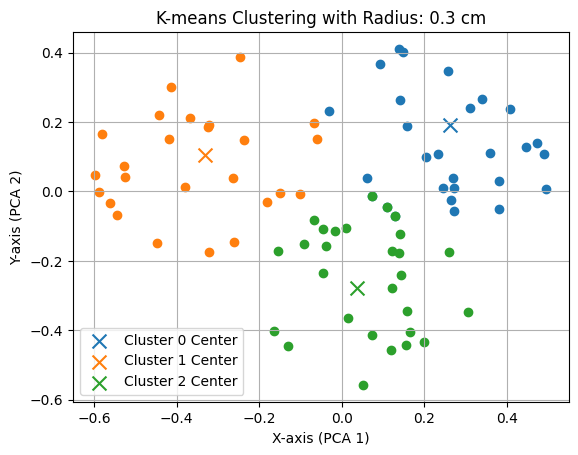

In [96]:


#print(cluster_assignments)


for i in range(len(cluster_assignments)):
    x, y = X_2D[i]
    for cluster in cluster_assignments[i]:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        plt.scatter(x, y, c=f'C{cluster_idx}', marker='o')

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='x', s=100, label=f'Cluster {i} Center')

# Plotting labels:
plt.title('K-means Clustering with Radius: '+str(radius_threshold)+' cm')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.legend()
plt.grid(True)
plt.show()




## K means clustering for IDMB dataset

#### Importing libraries

In [41]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

In [59]:
data = pd.read_csv('imdb_data.csv')
data['genre/0'], levels = pd.factorize(data['genre/0'])
data['genre/0'] = data['genre/0'].astype(float)
data['rating'] = data['rating'].astype(float)

# Save it to a new CSV file
data.to_csv('modified_imdb_dataset.csv', index=False)


In [66]:
train_data = pd.read_csv('modified_imdb_dataset.csv')
X = train_data[['genre/0','rating','movie_year']]

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

In [67]:
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(X_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [77]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

radius_threshold = 10

In [78]:
cluster_assignments = []
for data_point in X_2D:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(data_point - center)
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)

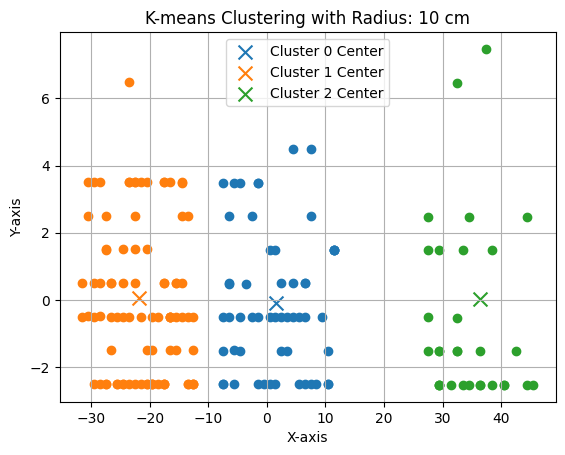

In [79]:
for i in range(len(cluster_assignments)):
    x, y = X_2D[i]
    for cluster in cluster_assignments[i]:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        plt.scatter(x, y, c=f'C{cluster_idx}', marker='o')

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='x', s=100, label=f'Cluster {i} Center')

# Plotting labels:
plt.title('K-means Clustering with Radius: '+str(radius_threshold)+' cm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()
